In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.datasets import make_regression


In [4]:
# TASK - 1

df=pd.read_csv("communities.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [5]:
N=5
for i in range (N):
    df.pop(df.columns.values[0])
print(df)

       5     6     7     8     9     10    11    12    13    14   ...   118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1989  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...  0.01   
1990  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...  0.02   
1991  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...  0.08   
1992  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...  0.03   
1993  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...  0.11   

       119   120   121   122   123  124   125   126

In [6]:
df=df.replace('?',np.nan)
df

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [9]:
df1 = df.apply (pd.to_numeric, errors='coerce')
df1 = df.dropna()
df1 = df.reset_index(drop=True)

print (df1)

      5     6     7     8     9     10    11    12    13    14   ...   118  \
0    0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1    0.15  0.31  0.40  0.63  0.14  0.06  0.58  0.72  0.65  0.47  ...  0.06   
2    0.25  0.54  0.05  0.71  0.48  0.30  0.42  0.48  0.28  0.32  ...  0.09   
3    1.00  0.42  0.47  0.59  0.12  0.05  0.41  0.53  0.34  0.33  ...  1.00   
4    0.11  0.43  0.04  0.89  0.09  0.06  0.45  0.48  0.31  0.46  ...  0.16   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
314  1.00  0.29  0.21  0.29  1.00  0.26  0.24  0.47  0.28  0.46  ...  0.13   
315  0.07  0.38  0.17  0.84  0.11  0.04  0.35  0.41  0.30  0.64  ...  0.09   
316  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...  0.08   
317  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...  0.03   
318  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...  0.11   

      119   120   121   122   123  124   125   126   127  
0   

In [10]:
# TASK - 2
from sklearn.model_selection import train_test_split
independent_data = df1.iloc[:, :-1]
dependent_data = df1.iloc[:, 1:]

In [11]:
Independent_train, Independent_test, Dependent_train, Dependent_test = \
train_test_split ( independent_data, dependent_data, test_size = 0.33, random_state = 0)

In [12]:
#print("actual values of text dependent: ", Dependent_test)

In [13]:
Model = LinearRegression()
Model.fit(Independent_train, Dependent_train)

LinearRegression()

In [14]:
from sklearn.linear_model import Ridge
myRidge = Ridge(alpha=1).fit(Independent_train, Dependent_train)        

In [15]:
myRidge.score(Independent_train, Dependent_train)

0.9787129672991384

In [16]:
prediction = myRidge.predict(Independent_test)


In [17]:
# TASK - 3

mean_squared_error(Dependent_train, myRidge.predict(Independent_train))

0.0006852425392376203

In [18]:
mean_absolute_error(Dependent_train, myRidge.predict(Independent_train))

0.017486775009614743

In [19]:
import math
math.sqrt(mean_squared_error(Dependent_test,prediction))

0.037229050715653564

In [20]:
myRidge.coef_

array([[-1.30415115e-03,  1.77804763e-01,  1.00312641e-02, ...,
        -3.52099496e-03,  3.93849690e-03,  4.41893447e-03],
       [ 7.13435828e-03,  1.00312641e-02,  5.40486545e-01, ...,
         8.62190931e-03, -6.03272873e-04, -2.24714092e-03],
       [-5.36950860e-03,  5.61673453e-03, -1.94311229e-01, ...,
        -2.36661228e-03, -5.76906812e-03,  2.46231481e-02],
       ...,
       [-6.50332758e-03,  3.93849690e-03, -6.03272873e-04, ...,
        -5.31494491e-03,  9.02305389e-01,  9.44669755e-03],
       [-1.81678461e-02,  4.41893447e-03, -2.24714092e-03, ...,
         5.95306677e-03,  9.44669755e-03,  4.21328088e-01],
       [-4.45102798e-02,  3.29862985e-02,  7.58500257e-02, ...,
         5.42120987e-02, -3.48819717e-02,  1.31283480e-02]])

In [21]:
myRidge.intercept_

array([ 7.77639387e-02,  2.13202497e-01,  3.76152193e-01,  2.17876649e-01,
        7.64984977e-02,  2.97604341e-01,  4.99785101e-01,  2.03253410e-01,
        4.60385540e-01,  3.94007647e-02,  8.01119940e-01,  9.70654634e-02,
        3.54820038e-01,  1.89749998e-01,  2.58008730e-01,  4.24808764e-01,
        3.82589715e-01,  4.93042145e-01,  6.24013580e-02,  1.56158568e-01,
        2.18559070e-01,  1.13135416e-01,  3.33658108e-02, -2.76087612e-02,
       -6.75518012e-02,  6.55464812e-03, -1.18190910e-01,  3.09082584e-01,
        3.56745037e-02,  1.97333191e-01,  2.19586485e-01,  2.95329075e-01,
        3.88256418e-01,  5.24426828e-02,  9.61737478e-02,  1.62228207e-01,
        3.08191408e-01,  4.20880549e-01,  1.62715744e-01,  3.62774664e-01,
        4.28331578e-01,  2.27609388e-01,  3.11154775e-01,  3.88981262e-01,
        2.86492257e-01,  2.53776211e-01,  2.26228538e-01,  9.28273029e-02,
        5.06497405e-02,  3.32625536e-01, -4.04055424e-02, -8.69337782e-02,
       -3.13650653e-03,  

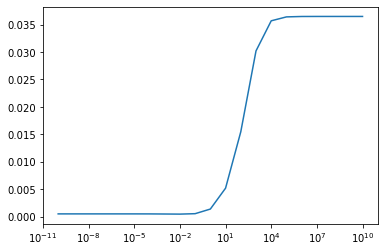

In [51]:
v=[]
u =[]
for i in range(0,21):
    n=i-10
    a=10**n
    myRidge=Ridge(alpha=a).fit(Independent_train,Dependent_train)
    prediction=myRidge.predict(Independent_test)
    v.append(mean_squared_error(Dependent_test,prediction))
    u.append(a)
    
plt.plot(u,v)
plt.xscale("log")
plt.show()

In [54]:
# TASK- 4                                                               

a_independent=df.iloc[:,:-1]
a_dependent=df.iloc[:,-1:]
a_independenttrain,a_independenttest,a_dependenttrain,a_dependenttest=\
train_test_split(a_independent,a_dependent,test_size=0.33,random_state=1)

train_error=[]
test_error=[]

for i in range(-10,11,1):
    a_model=Ridge(alpha=10**(i)).fit(a_independenttrain,a_dependenttrain)
    ay_prediction=a_model.predict(a_independenttest)
    ax_prediction=a_model.predict(a_independenttrain)
    
    test_error.append(mean_squared_error(a_dependenttest,ay_prediction))
    train_error.append(mean_squared_error(a_dependenttrain,ax_prediction))
    



In [55]:
alpha1=[]
for i in range(-10,11,1):
    alpha1.append(10**(i))

In [56]:
i_alpha_optim = np.argmax(test_error)
alpha_optim = alpha1[i_alpha_optim]

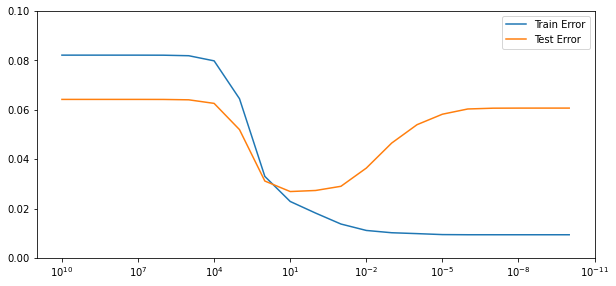

In [72]:
plt.figure(figsize=(10,10))   
plt.subplot(2, 1, 1)
plt.semilogx(alpha1, train_error, label="Train Error")
plt.semilogx(alpha1, test_error, label="Test Error")
plt.legend(loc="upper right")
plt.ylim([0, 0.1])
ax.set_xlabel('lambda')
ax.set_ylabel('error')
plt.gca().invert_xaxis()

In [84]:
# TASK - 5 
from sklearn import linear_model
lasso = Lasso(alpha=0.1).fit(Independent_train,Dependent_train)

print(lasso.score(Independent_train,Dependent_train))

0.005440573484356086


In [78]:
prediction = lasso.predict(Independent_test)
prediction

array([[0.43647887, 0.3288773 , 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793],
       [0.43647887, 0.32755023, 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793],
       [0.43647887, 0.32894365, 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793],
       ...,
       [0.43647887, 0.32768294, 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793],
       [0.43647887, 0.32834647, 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793],
       [0.43647887, 0.33299122, 0.58413146, ..., 0.5841784 , 0.19370892,
        0.44187793]])

In [82]:
mean_squared_error(Dependent_test,prediction)

0.035644539178979334

In [83]:
mean_absolute_error(Dependent_test,prediction)

0.14196407290028476

In [85]:
np.sqrt(mean_squared_error(Dependent_test,prediction))

0.18879761433603798

In [86]:
lasso.score(Independent_test,prediction)

1.0

In [88]:
lasso.coef_

array([[-0.        ,  0.        ,  0.        , ..., -0.        ,
         0.        , -0.        ],
       [ 0.        ,  0.        ,  0.00663535, ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [89]:
lasso.intercept_

array([0.43647887, 0.32748388, 0.58413146, 0.23173709, 0.24070423,
       0.42516432, 0.53751174, 0.36915493, 0.40586854, 0.25366197,
       0.99338028, 0.30699531, 0.53694836, 0.21723005, 0.43197183,
       0.44737089, 0.4229108 , 0.44262911, 0.32920188, 0.33206573,
       0.38539906, 0.25887324, 0.2013615 , 0.29098592, 0.27638498,
       0.35183099, 0.23455399, 0.40122066, 0.35629108, 0.4299061 ,
       0.35943662, 0.45802817, 0.47868545, 0.35300469, 0.45633803,
       0.38460094, 0.42957746, 0.55948357, 0.54755869, 0.59197183,
       0.59967136, 0.50901408, 0.4658216 , 0.46906103, 0.52657277,
       0.44755869, 0.47920188, 0.48239437, 0.18079812, 0.44389671,
       0.12676056, 0.39957746, 0.44530516, 0.48934272, 0.5215493 ,
       0.32375587, 0.32661972, 0.33098592, 0.32793427, 0.66901408,
       0.26586854, 0.34948357, 0.30126761, 0.43629108, 0.48544601,
       0.41075117, 0.42732394, 0.29197183, 0.60539906, 0.16431925,
       0.28619718, 0.67      , 0.41774648, 0.3658216 , 0.40713